In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_price_dataset=pd.read_csv('house_price_prediction.csv')

In [3]:
house_price_dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
house_price_dataset.drop(columns=['street','statezip','country','date','city'],inplace=True)

In [5]:
house_price_dataset.drop(['waterfront','view'],axis=1,inplace=True)

In [6]:
house_price_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992


In [7]:
house_price_dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [8]:
house_price_dataset.drop_duplicates(inplace=True)

In [9]:
house_price_dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

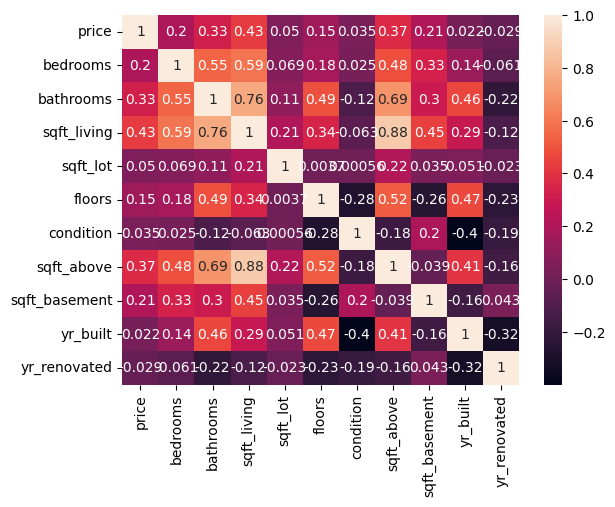

In [10]:
sns.heatmap(data=house_price_dataset.corr(),annot=True)
plt.show()

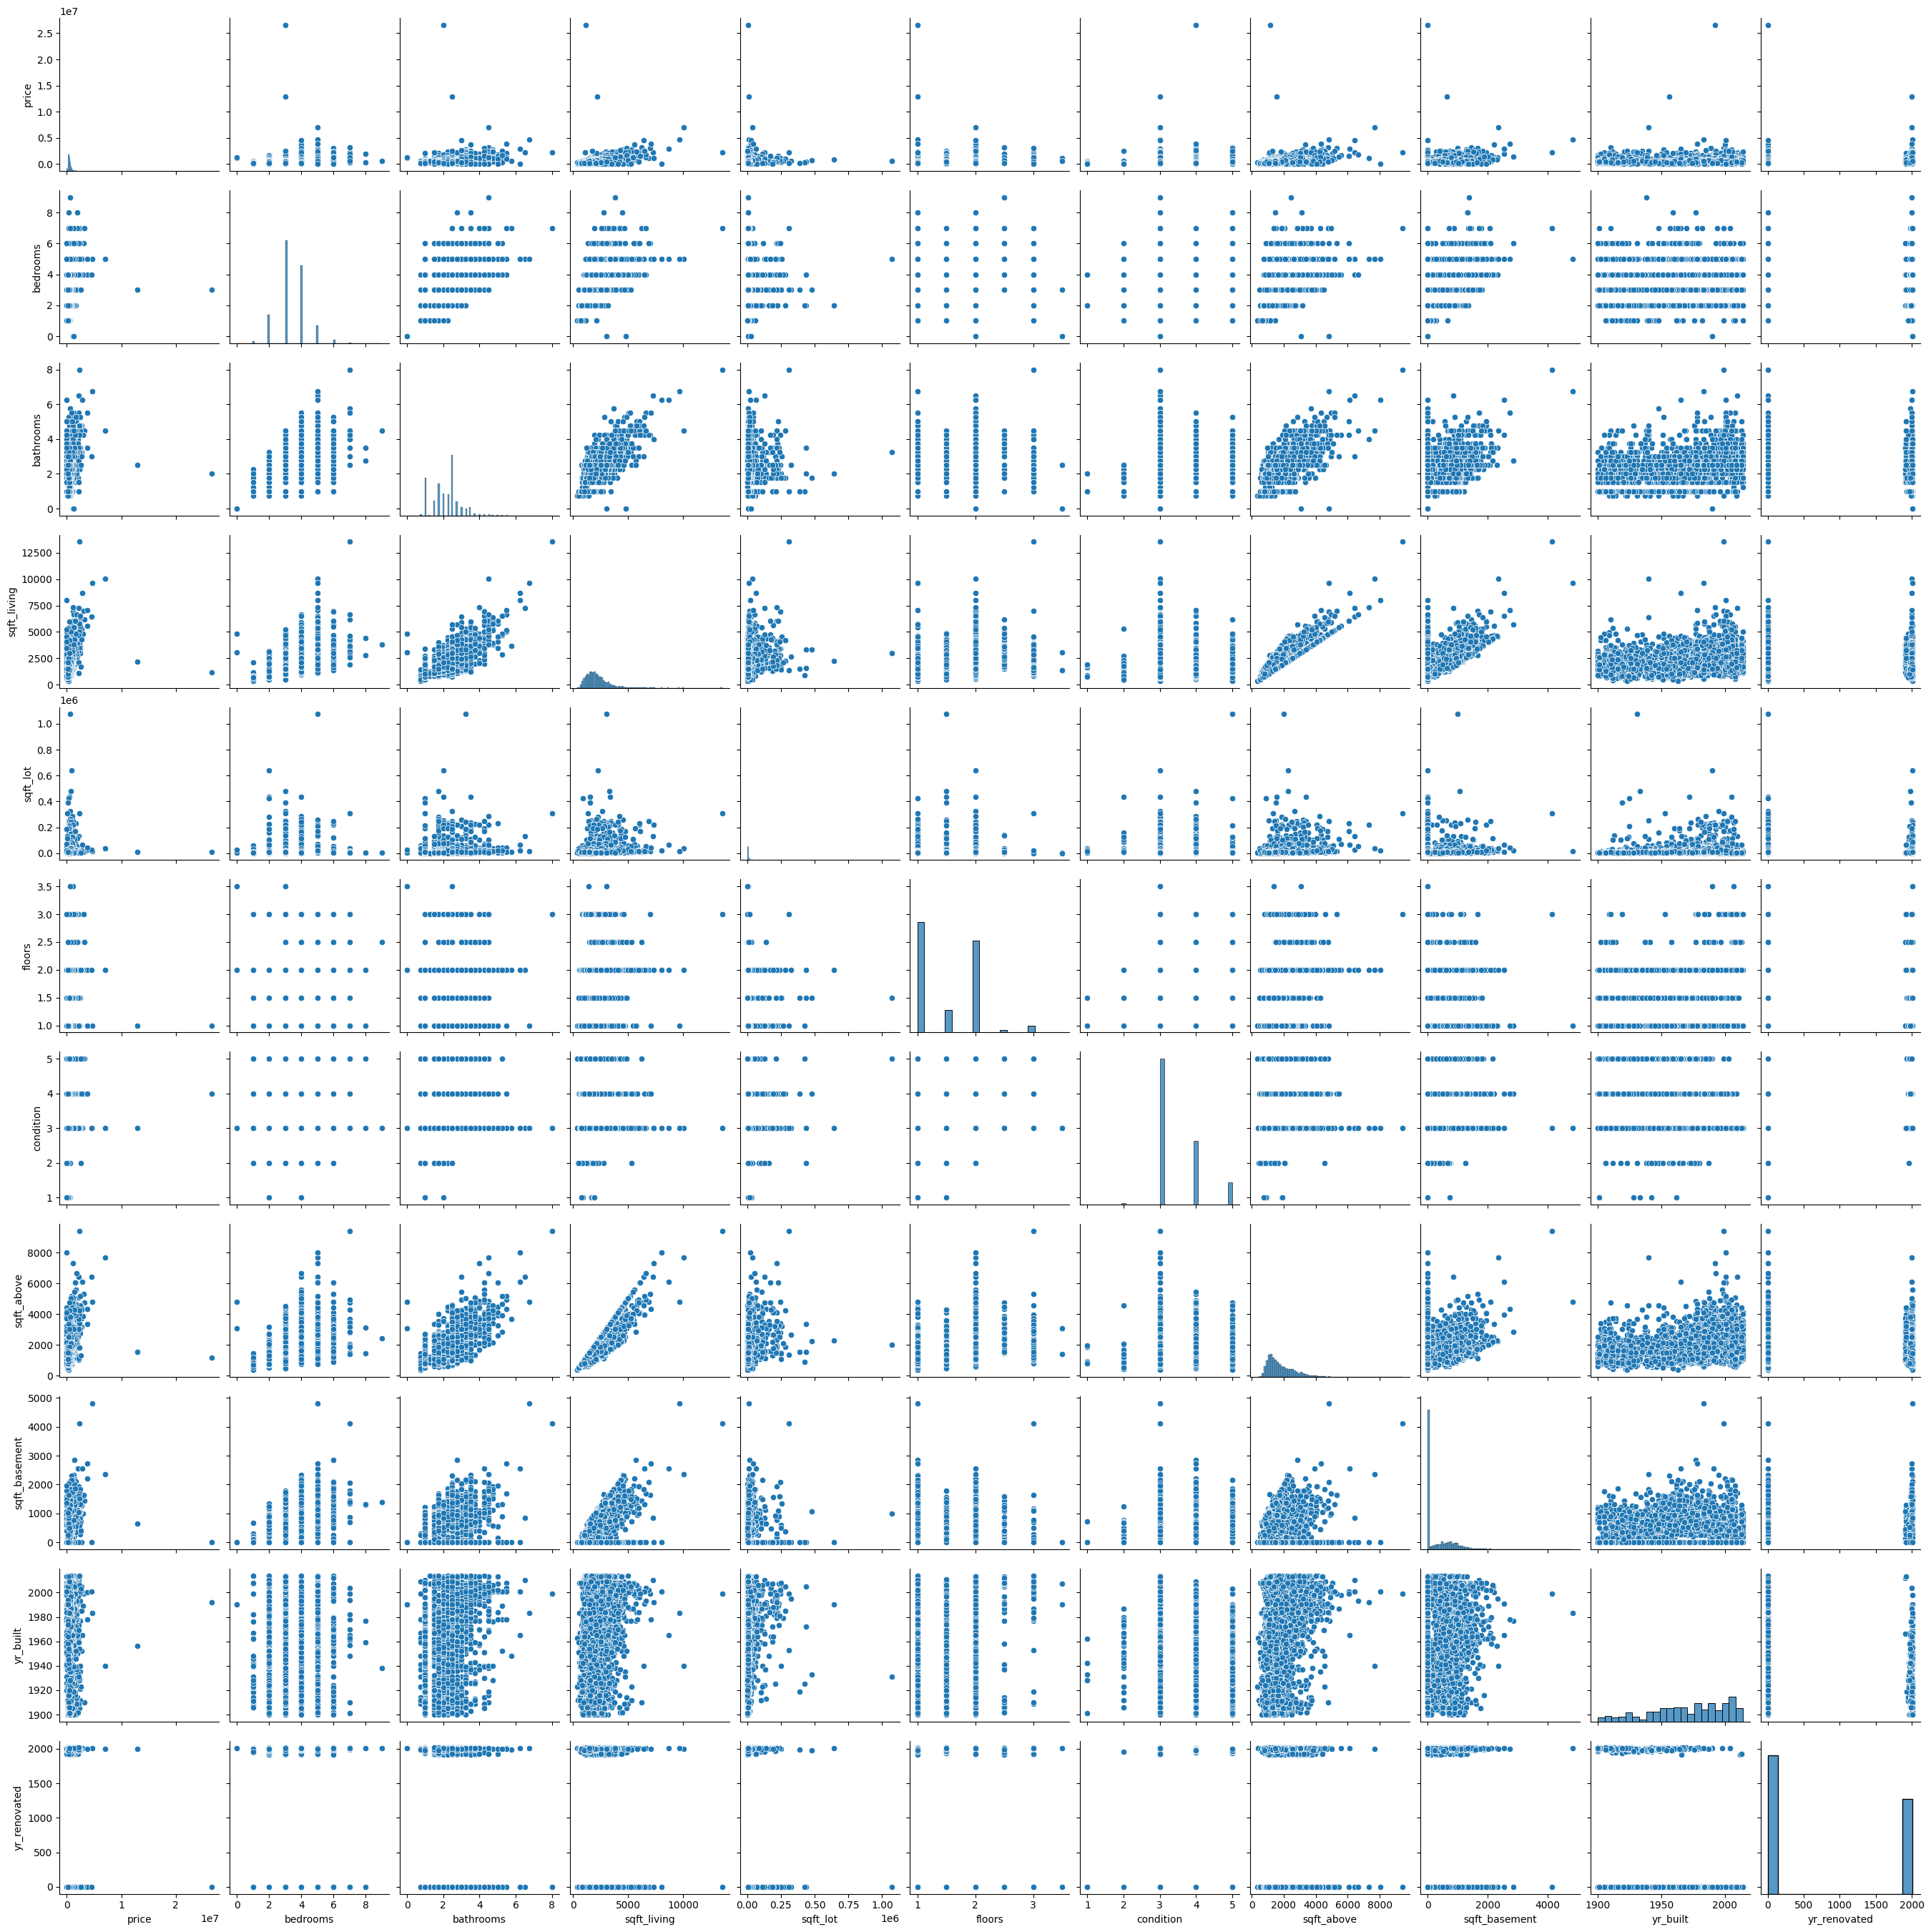

In [11]:
sns.pairplot(house_price_dataset)
plt.show()

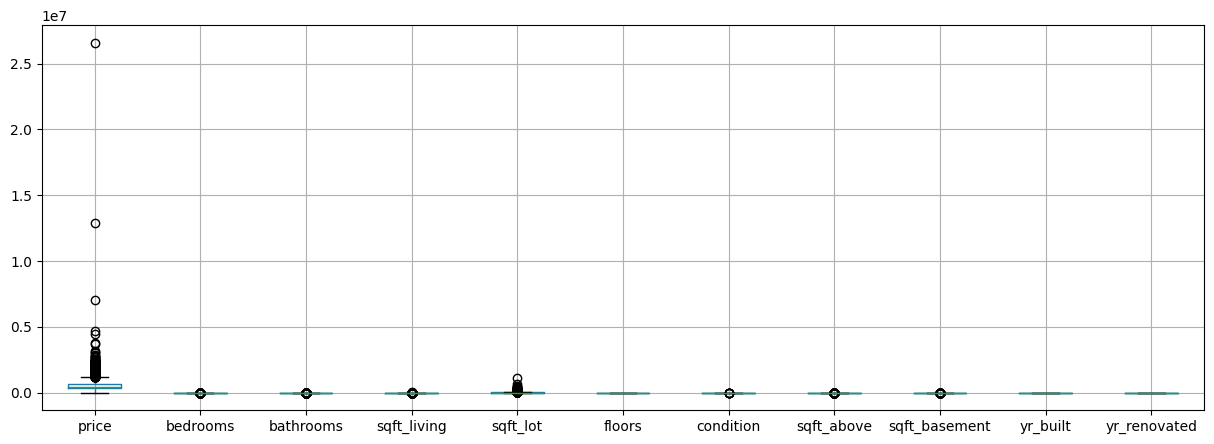

In [12]:
plt.figure(figsize=(15,5))
house_price_dataset.boxplot()
plt.show()

In [13]:

numeric_cols = house_price_dataset.select_dtypes(include=['float64', 'int64']).columns
# Compute IQR for numeric columns only
Q1 = house_price_dataset[numeric_cols].quantile(0.25)
Q3 = house_price_dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter only rows where all numeric features are within IQR range
house_price_dataset = house_price_dataset[~((house_price_dataset[numeric_cols] < (Q1 - 1.5 * IQR)) |
                                            (house_price_dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


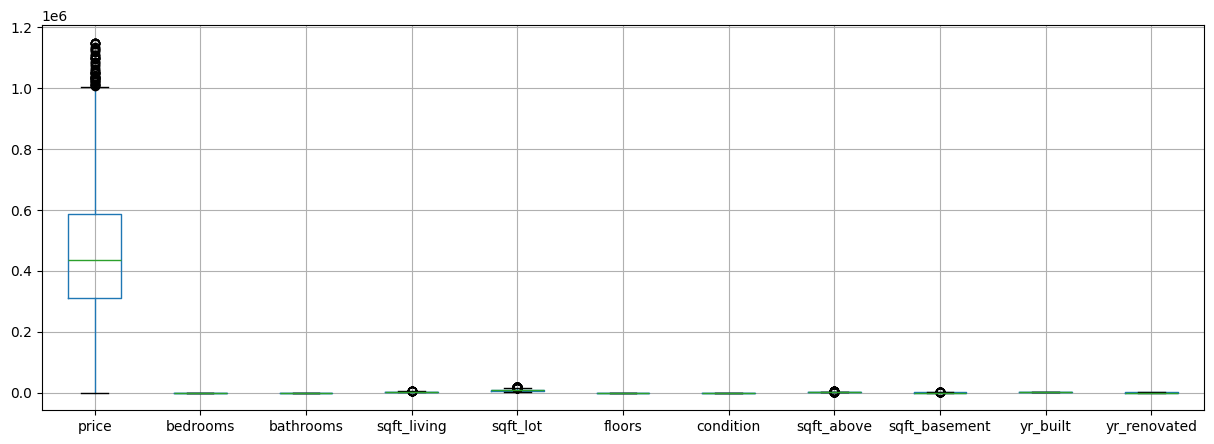

In [14]:
plt.figure(figsize=(15,5))
house_price_dataset.boxplot()
plt.show()

In [15]:
x=house_price_dataset.drop('price',axis=1)

In [65]:
y=house_price_dataset['price']


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

from sklearn.preprocessing import StandardScaler
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train[numeric_cols]), columns=numeric_cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[numeric_cols]), columns=numeric_cols)


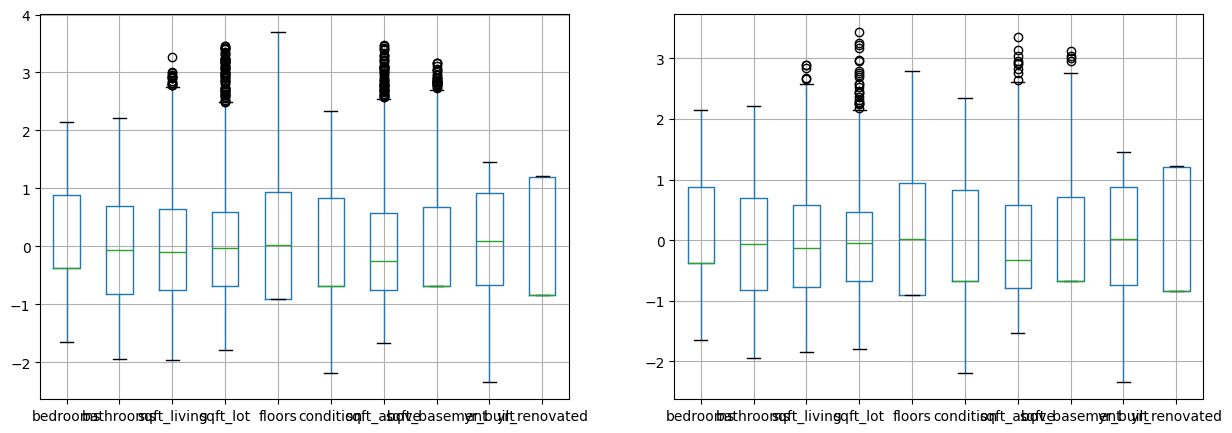

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x_train_scaled.boxplot()

plt.subplot(1,2,2)
x_test_scaled.boxplot()
plt.show()

In [69]:

numeric_cols_xtrain = x_train_scaled.select_dtypes(include=['float64', 'int64']).columns
# Compute IQR for numeric columns only
Q1 = x_train_scaled[numeric_cols].quantile(0.25)
Q3 = x_train_scaled[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter only rows where all numeric features are within IQR range
x_train_scaled = x_train_scaled[~((x_train_scaled[numeric_cols] < (Q1 - 1.5 * IQR)) |
                                            (x_train_scaled[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [70]:
numeric_cols_xtest = x_test_scaled.select_dtypes(include=['float64', 'int64']).columns
# Compute IQR for numeric columns only
Q1 = x_test_scaled[numeric_cols].quantile(0.25)
Q3 = x_test_scaled[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter only rows where all numeric features are within IQR range
x_test_scaled= x_test_scaled[~((x_test_scaled[numeric_cols] < (Q1 - 1.5 * IQR)) |
                                            (x_test_scaled[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

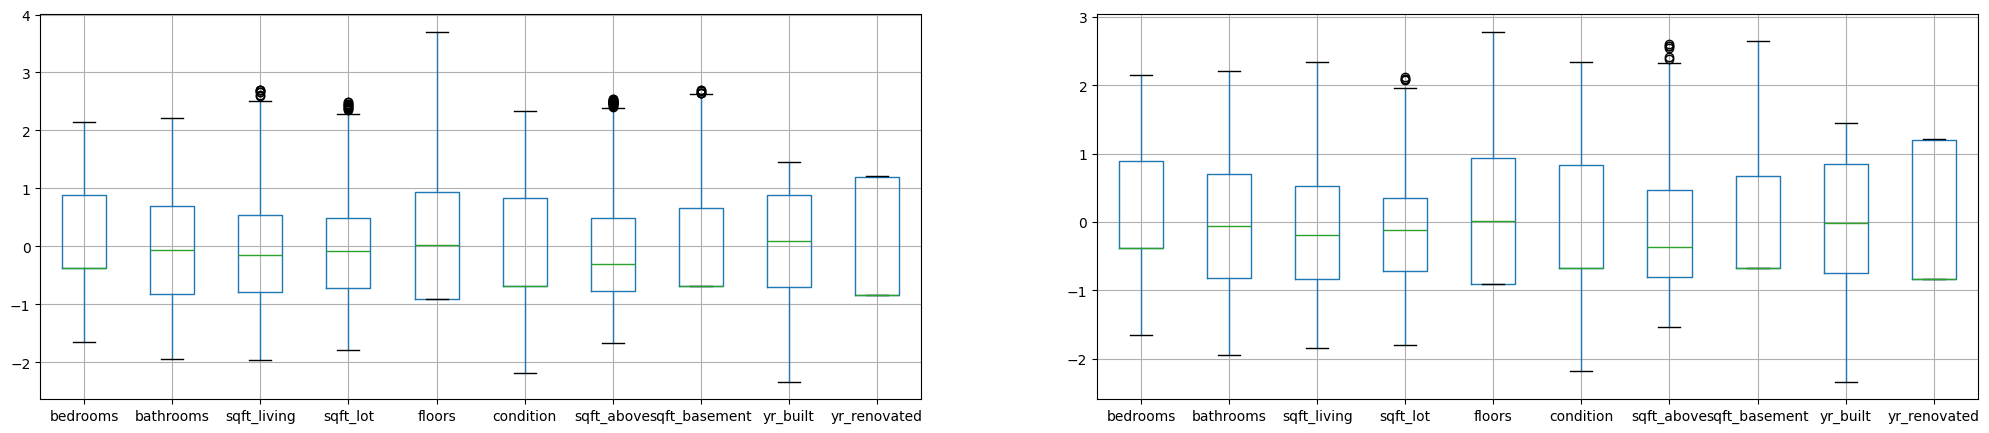

In [71]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
x_train_scaled.boxplot()

plt.subplot(1,2,2)
x_test_scaled.boxplot()
plt.show()

In [72]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_train_poly = pf.fit_transform(x_train_scaled)
x_test_poly = pf.transform(x_test_scaled)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr=LinearRegression()

In [75]:
from mlxtend.feature_selection import SequentialFeatureSelector
fs=SequentialFeatureSelector(lr,k_features=10,forward=True)

In [76]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(10, 10),
                          scoring='r2')

In [77]:
fs.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated')

In [78]:
fs.k_score_

0.4148304711163228

In [79]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
lr.score(x_test,y_test)

0.45123823485638104

In [81]:
predictions = lr.predict(x_test)

In [82]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 25258553101.81846


In [83]:
import numpy as np

rmse = np.sqrt(986921767056.11)
print("RMSE:", rmse)


RMSE: 993439.3625461546


In [84]:
x_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [85]:
print(x_test.iloc[0])
print(y_test.iloc[0])

bedrooms            3.0
bathrooms           2.0
sqft_living      2120.0
sqft_lot         7560.0
floors              1.0
condition           3.0
sqft_above       2120.0
sqft_basement       0.0
yr_built         1991.0
yr_renovated        0.0
Name: 4439, dtype: float64
237481.25


In [88]:
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated']

values = []
for col in columns:
    val = float(input(f"Enter {col.replace('_', ' ')}: "))
    values.append(val)


Enter bedrooms:  2
Enter bathrooms:  2
Enter sqft living:  2
Enter sqft lot:  2
Enter floors:  2
Enter condition:  2
Enter sqft above:  2
Enter sqft basement:  2
Enter yr built:  2
Enter yr renovated:  2


In [89]:
input_df = pd.DataFrame([values], columns=columns)

In [90]:
lr.predict(input_df)

array([4215206.74439589])

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print("Score:", model.score(X_test, y_test))


Score: 0.4449062779661841


In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("CV Avg Score:", scores.mean())


CV Avg Score: 0.4148888304602485


<Axes: xlabel='price', ylabel='Count'>

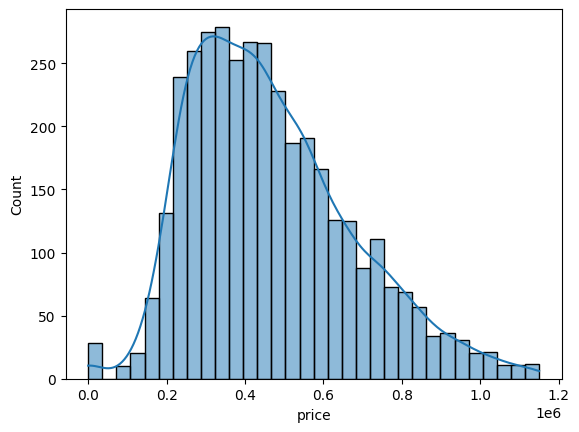

In [94]:
import seaborn as sns
sns.histplot(house_price_dataset['price'], kde=True)
